In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import multigrate as mtg
import scanpy as sc
import numpy as np
import pandas as pd

Global seed set to 0


In [2]:
rna1 = sc.read('../../data/trimodal_neurips/rna_hvg_cite.h5ad')
rna1

AnnData object with n_obs × n_vars = 90261 × 4000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'GEX_n_counts', 'GEX_n_genes', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'ATAC_pseudotime_order', 'technology', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay', 'split'
    var: 'feature_types', 'gene_id', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'GEX_X

In [3]:
rna2 = sc.read('../../data/trimodal_neurips/rna_hvg_multiome.h5ad')
rna2

AnnData object with n_obs × n_vars = 69249 × 4000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'GEX_n_counts', 'GEX_n_genes', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'ATAC_pseudotime_order', 'technology', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay', 'split'
    var: 'feature_types', 'gene_id', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'GEX_X

In [4]:
atac = sc.read('../../data/trimodal_neurips/atac_hvf_small.h5ad')
atac

AnnData object with n_obs × n_vars = 69249 × 20000
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'technology', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay', 'split'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'hvg', 'log1p', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'binary', 'counts', 'cpm', 'tf-idf-binary', 'tf-idf-counts'

In [5]:
adt = sc.read('../../data/trimodal_neurips/adt.h5ad')
adt

AnnData object with n_obs × n_vars = 90261 × 134
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay', 'split'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [6]:
np.sum(rna1.obs_names != adt.obs_names)

0

In [7]:
np.sum(rna2.obs_names != atac.obs_names)

0

In [8]:
np.max(rna1.layers['counts'])

35451.0

In [9]:
np.max(rna2.layers['counts'])

7322.0

In [10]:
np.max(adt.X)

7.874281

In [11]:
adata = mtg.data.organize_multiome_anndatas(
    adatas = [[rna1, rna2], [None, atac], [adt, None]],
    groups = [[0, 1], [0, 1], [0, 1]],
    layers = [['counts', 'counts'], [None, 'cpm'], [None, None]],
    modality_lengths=[4000, 20000, 134],
)
adata

AnnData object with n_obs × n_vars = 159510 × 24134
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'GEX_n_counts', 'GEX_n_genes', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'ATAC_pseudotime_order', 'technology', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay', 'split', 'group', 'concat_batch'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'fe

In [12]:
adata.var_names_make_unique()

In [13]:
query = adata[adata.obs['split'] != 'train'].copy()
adata = adata[adata.obs['split'] == 'train'].copy()

In [14]:
mtg.model.MultiVAE.setup_anndata(
    adata,
    categorical_covariate_keys=['Samplename', 'assay'],
    rna_indices_end=4000,
)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 105164 cells, 24134 vars, 1       
         batches, 1 labels, and 0 proteins. Also registered 2 extra categorical covariates   
         and 1 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [16]:
model = mtg.model.MultiVAE.load('multigrate_reference/', adata=adata)

INFO     Using data from adata.X                                                             
INFO     Registered keys:['X', 'batch_indices', 'labels', 'cat_covs', 'cont_covs']           
INFO     Successfully registered anndata object containing 105164 cells, 24134 vars, 1       
         batches, 1 labels, and 0 proteins. Also registered 2 extra categorical covariates   
         and 1 extra continuous covariates.                                                  


# Query to reference mapping

In [17]:
rna_index_end = 4000

In [18]:
idx_atac_query = query.obs['Samplename'] == 'site1_donor3_multiome'
idx_scrna_query = query.obs['Samplename'] == 'site2_donor5_cite'
idx_snrna_query = query.obs['Samplename'] == 'site2_donor5_multiome'

In [19]:
query[idx_atac_query, :rna_index_end].X = 0
query[idx_scrna_query, rna_index_end:].X = 0
query[idx_snrna_query, rna_index_end:].X = 0

In [20]:
mtg.model.MultiVAE.setup_anndata(
    query,
    categorical_covariate_keys=['Samplename', 'assay'],
    rna_indices_end=4000 
)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 54346 cells, 24134 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 2 extra categorical covariates   
         and 1 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [21]:
q_model = mtg.model.MultiVAE.load_query_data(query, model)

INFO     Using data from adata.X                                                             
INFO     Registered keys:['X', 'batch_indices', 'labels', 'cat_covs', 'cont_covs']           
INFO     Successfully registered anndata object containing 54346 cells, 24134 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 2 extra categorical covariates   
         and 1 extra continuous covariates.                                                  


In [22]:
q_model.train(max_epochs=200, lr=1e-3, batch_size=256, weight_decay=0)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 1/200:   0%|          | 1/200 [00:16<55:59, 16.88s/it, loss=1.24e+03, v_num=1]

Metric elbo_validation improved. New best score: 1286.408


Epoch 2/200:   1%|          | 2/200 [00:25<39:17, 11.91s/it, loss=1.13e+03, v_num=1]

Metric elbo_validation improved by 8.762 >= min_delta = 0.0. New best score: 1277.645


Epoch 3/200:   2%|▏         | 3/200 [00:33<33:46, 10.29s/it, loss=1.25e+03, v_num=1]

Metric elbo_validation improved by 4.434 >= min_delta = 0.0. New best score: 1273.212


Epoch 4/200:   2%|▏         | 4/200 [00:42<31:30,  9.64s/it, loss=1.31e+03, v_num=1]

Metric elbo_validation improved by 2.684 >= min_delta = 0.0. New best score: 1270.528


Epoch 5/200:   2%|▎         | 5/200 [00:50<29:33,  9.10s/it, loss=1.25e+03, v_num=1]

Metric elbo_validation improved by 4.622 >= min_delta = 0.0. New best score: 1265.906


Epoch 6/200:   3%|▎         | 6/200 [00:58<28:28,  8.81s/it, loss=1.27e+03, v_num=1]

Metric elbo_validation improved by 0.151 >= min_delta = 0.0. New best score: 1265.755


Epoch 7/200:   4%|▎         | 7/200 [01:06<27:30,  8.55s/it, loss=1.32e+03, v_num=1]

Metric elbo_validation improved by 1.624 >= min_delta = 0.0. New best score: 1264.131


Epoch 8/200:   4%|▍         | 8/200 [01:14<26:17,  8.21s/it, loss=1.25e+03, v_num=1]

Metric elbo_validation improved by 2.020 >= min_delta = 0.0. New best score: 1262.111


Epoch 9/200:   4%|▍         | 9/200 [01:22<26:23,  8.29s/it, loss=1.2e+03, v_num=1] 

Metric elbo_validation improved by 2.067 >= min_delta = 0.0. New best score: 1260.044


Epoch 10/200:   5%|▌         | 10/200 [01:30<25:57,  8.20s/it, loss=1.24e+03, v_num=1]

Metric elbo_validation improved by 0.536 >= min_delta = 0.0. New best score: 1259.509


Epoch 11/200:   6%|▌         | 11/200 [01:38<25:30,  8.10s/it, loss=1.23e+03, v_num=1]

Metric elbo_validation improved by 0.718 >= min_delta = 0.0. New best score: 1258.791


Epoch 12/200:   6%|▌         | 12/200 [01:46<25:02,  7.99s/it, loss=1.36e+03, v_num=1]

Metric elbo_validation improved by 1.842 >= min_delta = 0.0. New best score: 1256.948


Epoch 20/200:  10%|█         | 20/200 [02:49<23:36,  7.87s/it, loss=1.2e+03, v_num=1] 

Metric elbo_validation improved by 1.516 >= min_delta = 0.0. New best score: 1255.433


Epoch 25/200:  12%|█▎        | 25/200 [03:28<22:58,  7.88s/it, loss=1.17e+03, v_num=1]

Metric elbo_validation improved by 0.018 >= min_delta = 0.0. New best score: 1255.415


Epoch 58/200:  29%|██▉       | 58/200 [07:52<18:58,  8.01s/it, loss=1.27e+03, v_num=1]

Metric elbo_validation improved by 0.836 >= min_delta = 0.0. New best score: 1254.578


Epoch 77/200:  38%|███▊      | 77/200 [10:25<16:24,  8.01s/it, loss=1.18e+03, v_num=1]

Metric elbo_validation improved by 1.834 >= min_delta = 0.0. New best score: 1252.744


Epoch 122/200:  61%|██████    | 122/200 [16:32<10:14,  7.88s/it, loss=1.26e+03, v_num=1]

Monitored metric elbo_validation did not improve in the last 45 records. Best score: 1252.744. Signaling Trainer to stop.


Epoch 122/200:  61%|██████    | 122/200 [16:32<10:34,  8.14s/it, loss=1.26e+03, v_num=1]


In [23]:
q_model.get_latent_representation(batch_size=256, adata=query)

In [24]:
q_model.get_latent_representation(batch_size=256, adata=adata)

INFO     Using data from adata.X                                                             
INFO     Registered keys:['X', 'batch_indices', 'labels', 'cat_covs', 'cont_covs']           
INFO     Successfully registered anndata object containing 105164 cells, 24134 vars, 1       
         batches, 1 labels, and 0 proteins. Also registered 2 extra categorical covariates   
         and 1 extra continuous covariates.                                                  


In [25]:
adata.obs['reference'] = 'reference'
query.obs['reference'] = 'CITE-seq query'
query.obs.loc[idx_atac_query, 'reference'] = 'ATAC query'
query.obs.loc[idx_scrna_query, 'reference'] = 'scRNA query'
query.obs.loc[idx_snrna_query, 'reference'] = 'snRNA query'
query.obs.loc[query.obs['Samplename'].isin(['site3_donor10_multiome', 'site4_donor9_multiome']), 'reference'] = 'multiome query'

In [26]:
adata_both = adata.concatenate(query)

In [27]:
sc.pp.neighbors(adata_both, use_rep='latent')
sc.tl.umap(adata_both)

# Plots

In [28]:
adata_both.obs['split'] = adata_both.obs['split'].astype('category').cat.rename_categories({'train': 'reference', 'test': 'query'})

In [29]:
adata_both.obs['assay'] = adata_both.obs['assay'].cat.rename_categories({'cite_wnn': 'CITE-seq', 'openproblems_atac': 'multiome'})

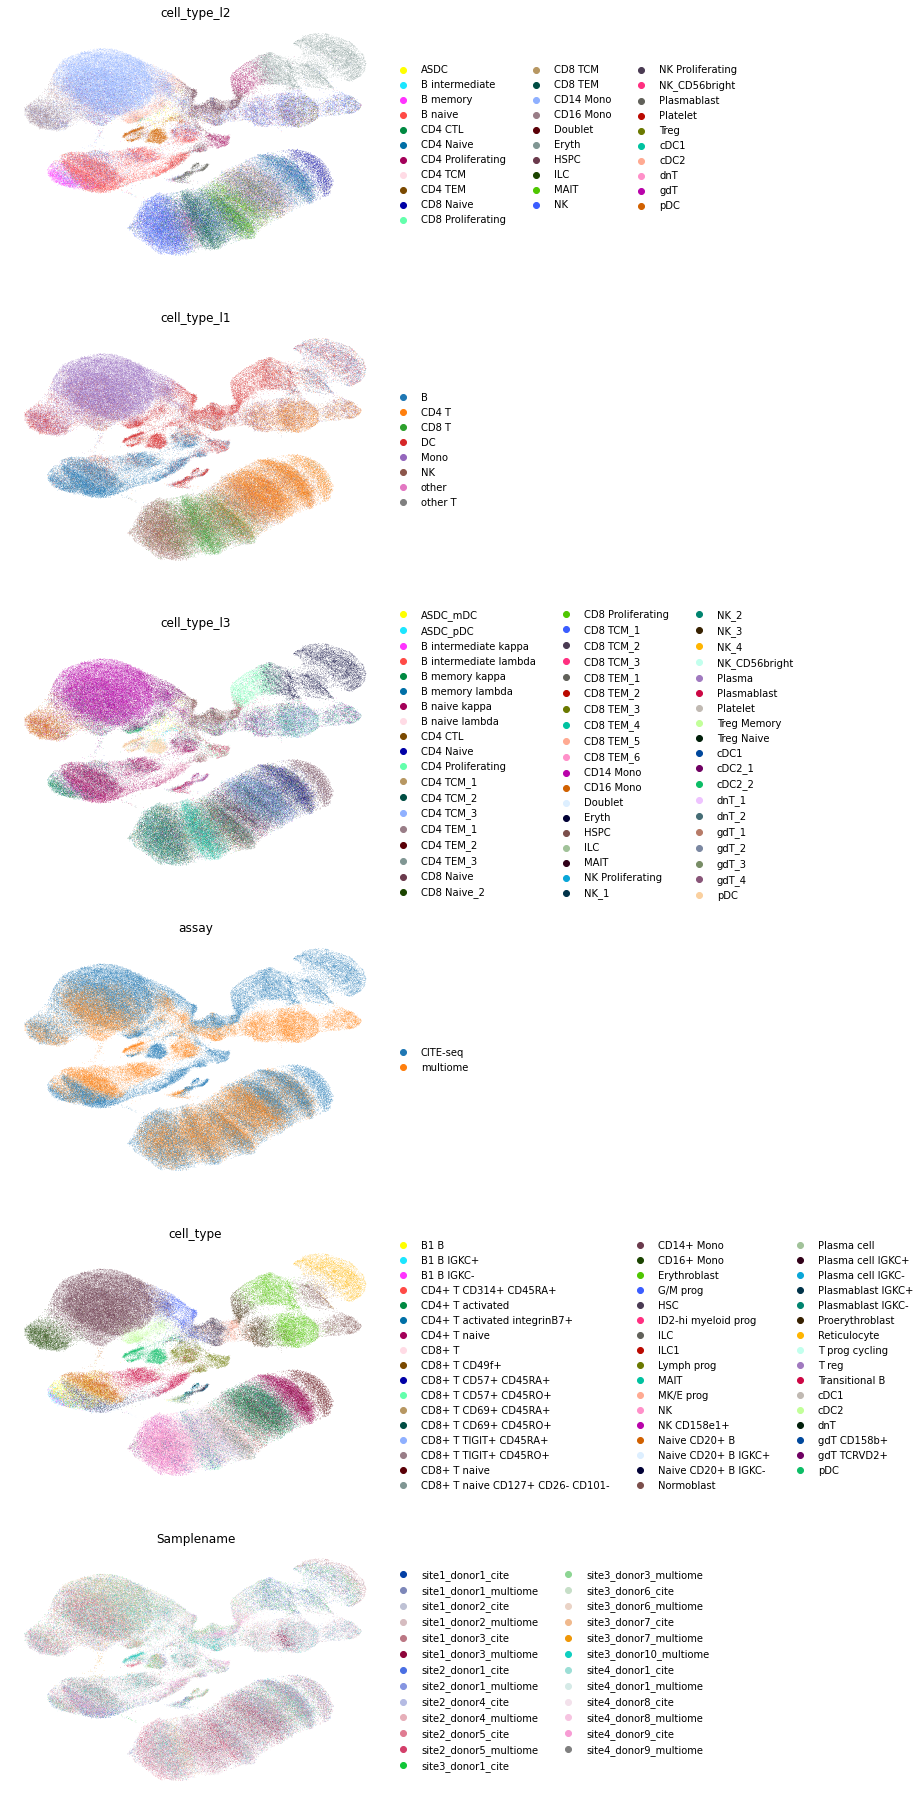

In [30]:
sc.pl.umap(adata_both, color=['cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay', 'cell_type', 'Samplename'], ncols=1, frameon=False)

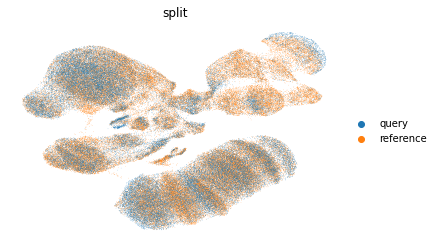

In [31]:
sc.pl.umap(
    adata_both,
    color='split',
    ncols=1,
    frameon=False,
    palette=sc.pl.palettes.default_20
)

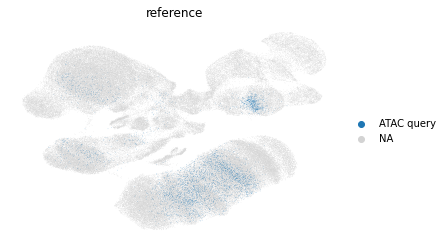

In [33]:
sc.pl.umap(
    adata_both,
    color='reference', 
    ncols=1,
    frameon=False,
    palette=sc.pl.palettes.default_20,
    groups=['ATAC query']
)

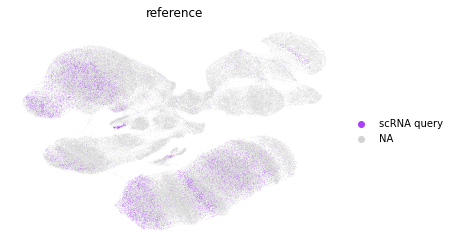

In [34]:
sc.pl.umap(
    adata_both,
    color='reference', 
    ncols=1,
    frameon=False,
    palette=sc.pl.palettes.default_20,
    groups=['scRNA query']
)

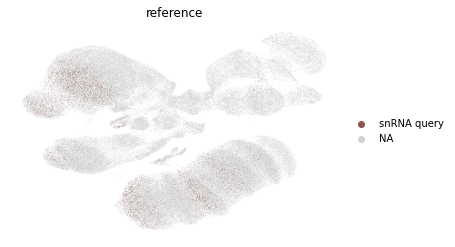

In [35]:
sc.pl.umap(
    adata_both,
    color='reference', 
    ncols=1,
    frameon=False,
    palette=sc.pl.palettes.default_20,
    groups=['snRNA query']
)

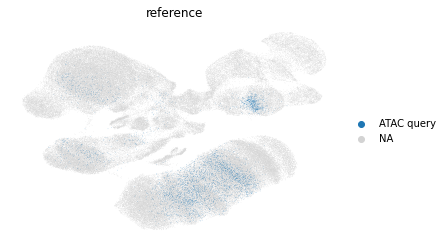

In [36]:
sc.pl.umap(
    adata_both,
    color='reference', 
    ncols=1,
    frameon=False,
    palette=sc.pl.palettes.default_20,
    groups=['ATAC query']
)